In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.shape

(8807, 12)

In [8]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)


In [10]:
# Show columns with missing values
missing = df.isnull().sum()
print(missing[missing > 0])

df['director'] = df['director'].fillna("Not Available")
df['cast'] = df['cast'].fillna("Not Available")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Not Rated")
df['date_added'] = df['date_added'].ffill()  # forward fill correctly



duration    3
dtype: int64


In [15]:
# Extract date parts
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
print(df['date_added'].dtype)

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

datetime64[ns]


In [12]:
# Standardize text columns
df['title'] = df['title'].str.strip()
df['director'] = df['director'].str.lower().str.strip()
df['cast'] = df['cast'].str.lower().str.strip()
df['country'] = df['country'].str.lower().str.strip()
df['rating'] = df['rating'].str.upper().str.strip()
df['description'] = df['description'].str.strip()

In [13]:
# Handle 'duration' column
df[['duration_num', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')

In [14]:
# Clean genre column
df['genre_list'] = df['listed_in'].str.split(', ')

In [16]:
df.isnull().sum()


show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added       88
release_year      0
rating            0
duration          3
listed_in         0
description       0
duration_num      3
duration_type     3
genre_list        0
year_added       88
month_added      88
dtype: int64

In [17]:
df.dtypes


show_id                  object
type                     object
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                 object
listed_in                object
description              object
duration_num            float64
duration_type            object
genre_list               object
year_added              float64
month_added             float64
dtype: object

In [18]:
df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_type,genre_list,year_added,month_added
count,8807,8807,8807,8807,8807,8807,8719,8807.000000,8807,8804,8807,8807,8804.000000,8804,8807,8719.000000,8719.000000
unique,8807,2,8806,4527,7693,749,NaN,NaN,18,220,514,8775,NaN,3,514,NaN,NaN
top,s1,Movie,Consequences,not available,not available,united states,NaN,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",NaN,min,"[Dramas, International Movies]",NaN,NaN
freq,1,6131,2,2634,825,2818,NaN,NaN,3207,1793,362,4,NaN,6128,362,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-22 09:49:26.624612864,2014.180198,NaN,NaN,NaN,NaN,69.846888,NaN,NaN,2018.886225,6.652024
min,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2008.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-17 12:00:00,2013.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,2018.000000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-12 00:00:00,2017.000000,NaN,NaN,NaN,NaN,88.000000,NaN,NaN,2019.000000,7.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-25 00:00:00,2019.000000,NaN,NaN,NaN,NaN,106.000000,NaN,NaN,2020.000000,10.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,NaN,NaN,NaN,312.000000,NaN,NaN,2021.000000,12.000000


In [19]:
print(df['type'].unique())
print(df['rating'].unique())
print(df['duration_type'].unique())


['Movie' 'TV Show']
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 MIN' '84 MIN' '66 MIN' 'NR' 'NOT RATED' 'TV-Y7-FV' 'UR']
['min' 'Seasons' 'Season' nan]


In [20]:
df.duplicated(subset=['title', 'type', 'release_year']).sum()


np.int64(1)

In [21]:
# Fix ratings
wrong_ratings = ['74 MIN', '84 MIN', '66 MIN']
df['rating'] = df['rating'].replace(wrong_ratings, "Not Rated")

# Standardize duration_type
df['duration_type'] = df['duration_type'].replace('Seasons', 'Season')

# Drop rows with NaN in critical columns
df = df.dropna(subset=['date_added', 'duration'])

# Remove final duplicate
df.drop_duplicates(subset=['title', 'type', 'release_year'], inplace=True)

# Re-extract year/month after dropping NaN
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [22]:
print(df.isnull().sum())
print(df['rating'].unique())
print(df['duration_type'].unique())
print(df.duplicated(subset=['title', 'type', 'release_year']).sum())


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
duration_num     0
duration_type    0
genre_list       0
year_added       0
month_added      0
dtype: int64
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' 'NOT RATED' 'TV-Y7-FV' 'UR']
['min' 'Season']
0


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
##Content Type Distribution (Movies vs. TV Shows)

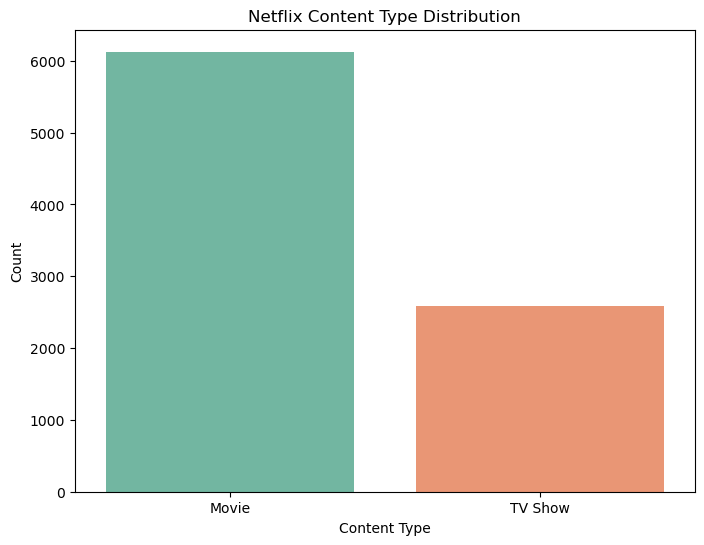

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title('Netflix Content Type Distribution')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()



In [31]:
## Top 10 Genres

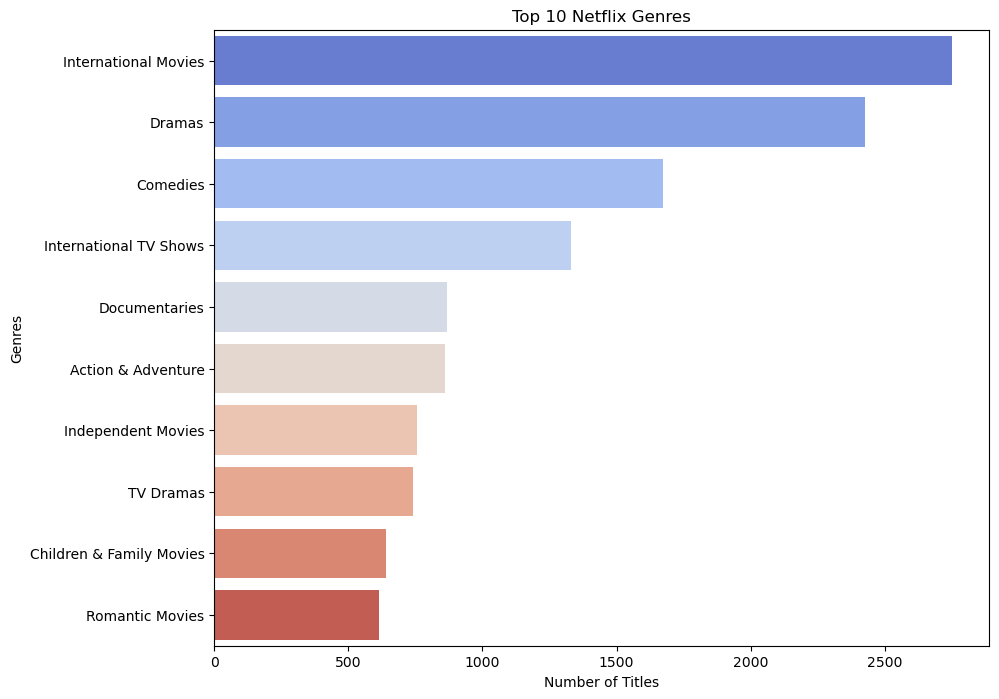

In [38]:
plt.figure(figsize=(10,8))
top_genres = df.explode('genre_list')['genre_list'].value_counts().head(10)
sns.barplot(y=top_genres.index, x=top_genres.values, hue=top_genres.index, palette='coolwarm', legend=False)
plt.title('Top 10 Netflix Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.show()



In [35]:
##Top 10 Countries by Number of Titles

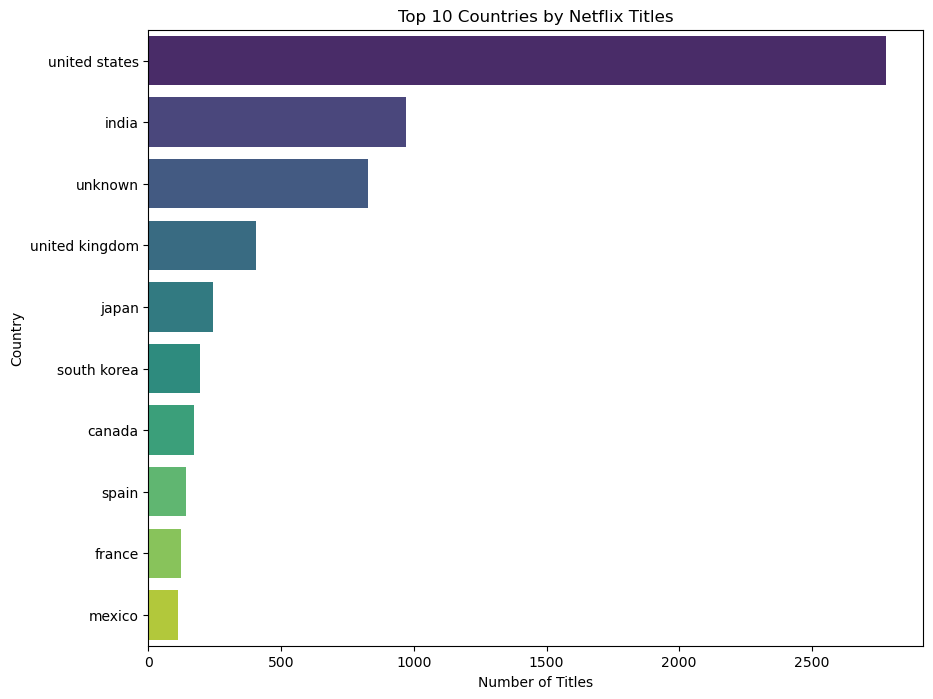

In [40]:
plt.figure(figsize=(10,8))
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, 
            x=top_countries.values, 
            hue=top_countries.index, 
            palette='viridis', 
            legend=False)
plt.title('Top 10 Countries by Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


In [30]:
##Content Added Over Time (Yearly trends)

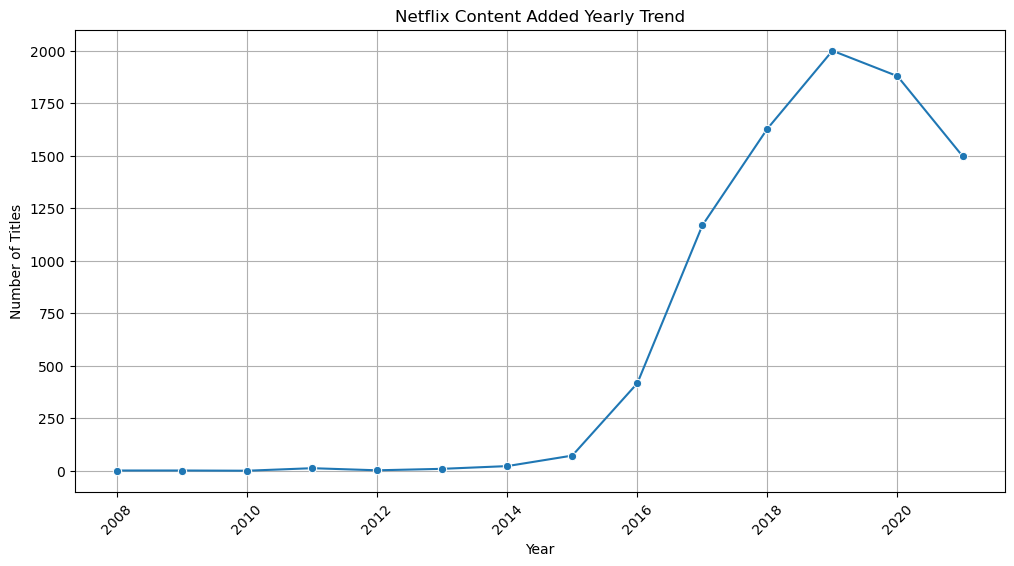

In [28]:
plt.figure(figsize=(12,6))
content_yearly = df['year_added'].value_counts().sort_index()
sns.lineplot(x=content_yearly.index, y=content_yearly.values, marker='o')
plt.title('Netflix Content Added Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [32]:
##Distribution of Ratings (PG, R, etc.)

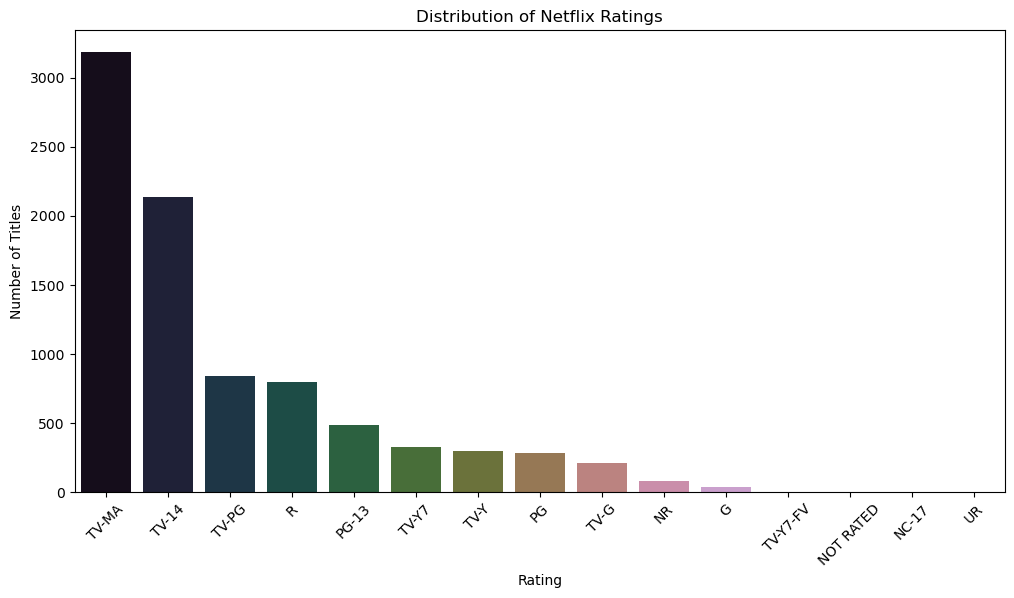

In [37]:
plt.figure(figsize=(12,6))
ratings_count = df['rating'].value_counts()
sns.barplot(x=ratings_count.index, y=ratings_count.values, hue=ratings_count.index, palette='cubehelix', legend=False)
plt.title('Distribution of Netflix Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()



In [41]:
df.to_csv('clean_netflix_titles.csv', index=False)


# 